# 🔷 Overview

Support Vector Machine (**SVM**) is one of the fundamental algorithms in **machine learning**, widely used for **classification and regression problems**. Unlike Logistic Regression, which models probabilities, SVM is a **supervised learning algorithm** that makes predictions by finding the optimal **hyperplane** to separate different classes in the feature space. SVM relies on **kernel functions** to transform data into higher-dimensional spaces, allowing it to handle **non-linearly separable problems**.

## 🔹 What is an SVM Kernel?
SVM Kernels are mathematical functions that transform input data into a higher-dimensional space, making it easier to find an optimal hyperplane for classification. Different kernel functions suit different types of data distributions.

## 🔥 Popular SVM Kernels:

- **Linear Kernel** ➖ Used when data is linearly separable.
- **Polynomial Kernel** 🔺 Captures complex patterns with polynomial transformations.
- **Radial Basis Function (RBF) Kernel** 🌐 Most commonly used; maps data into infinite-dimensional space.
- **Sigmoid Kernel** 📉 Similar to neural networks, useful for probabilistic outputs.

## 📌 The SVM Kernel Formula:

$$
K(x, x') = \exp\left(-\gamma \|x - x'\|^2\right)
$$

Where:

✔ **\(K(x, x')\) (Kernel Function)** → Measures similarity between two data points in a transformed space.  
✔ **\(x, x'\) (Feature Vectors)** → The input data points in the original feature space.  
✔ **\(\gamma\) (Gamma Parameter)** → Controls the influence of a single training example; higher values lead to tighter decision boundaries.  

⚠ **Choosing the Right Kernel:**  
- **Linear Kernel** ➖ Best for linearly separable data.  
- **Polynomial Kernel** 🔺 Useful for complex feature interactions.  
- **RBF Kernel** 🌐 Most commonly used; maps data into an infinite-dimensional space.  

🔑 **Key Insight:**  
- **RBF Kernel is a powerful choice** for handling **non-linearly separable** data.  
- **Transforms data into higher dimensions** using the Gaussian function.  
- **Highly flexible** with a well-tuned **gamma (\(\gamma\))** parameter.  
- **Works well with SVM margin maximization**, improving generalization.  
- **Widely used in image recognition, bioinformatics, and text classification**. 🚀  

💡 **SVM with RBF Kernel excels in complex classification tasks where simple decision boundaries are not sufficient!**

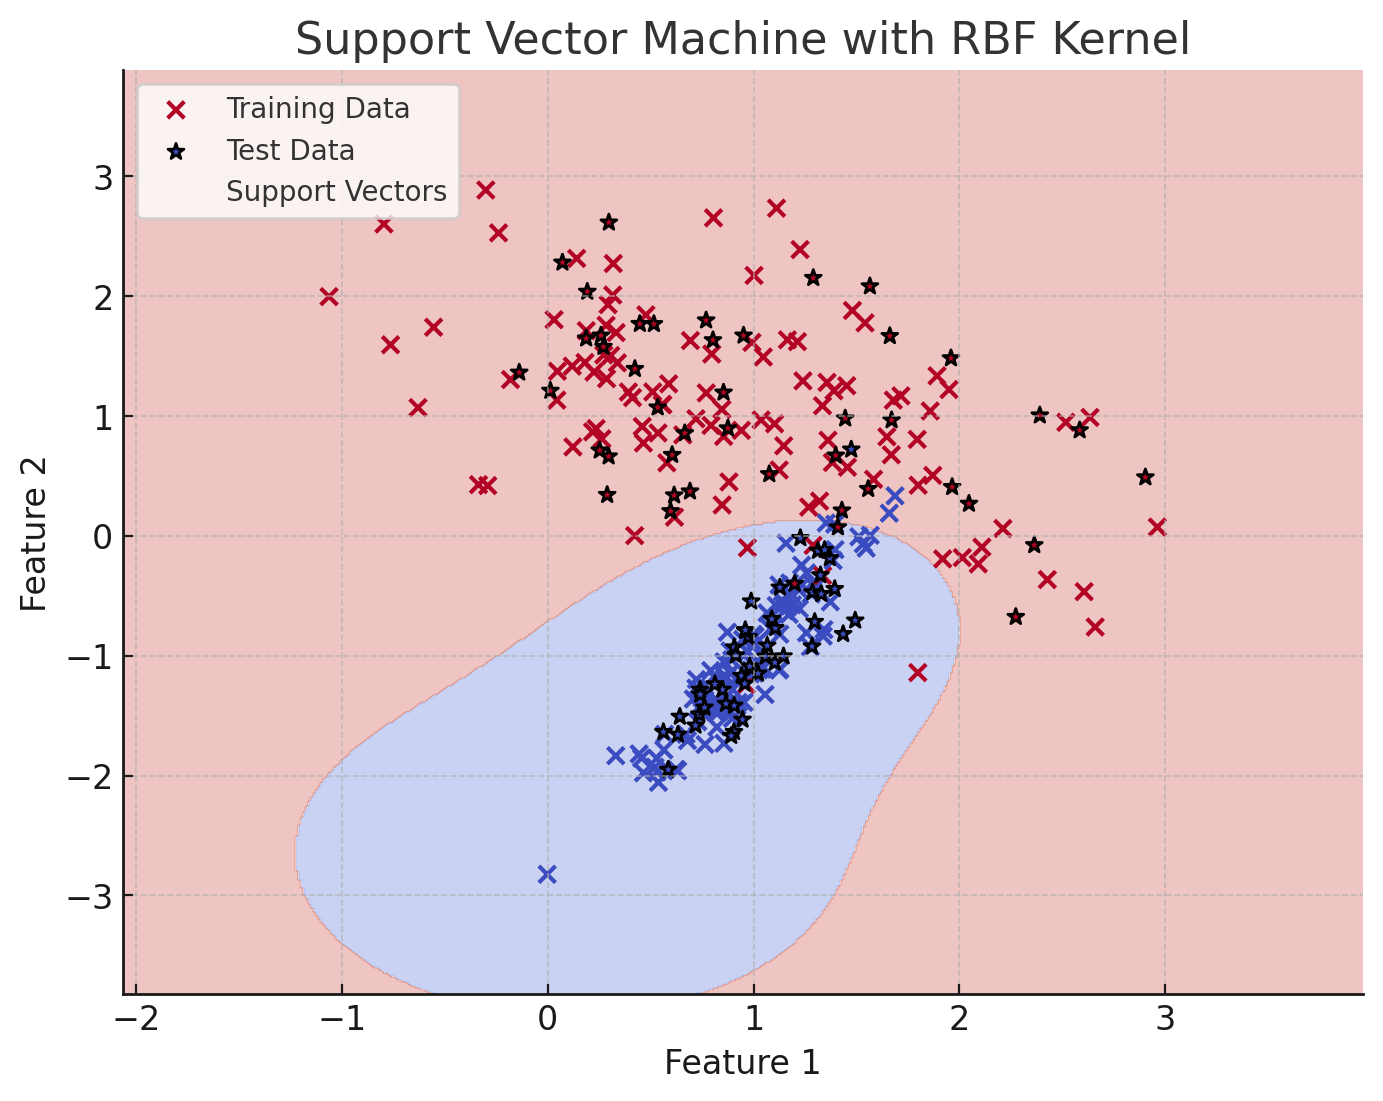

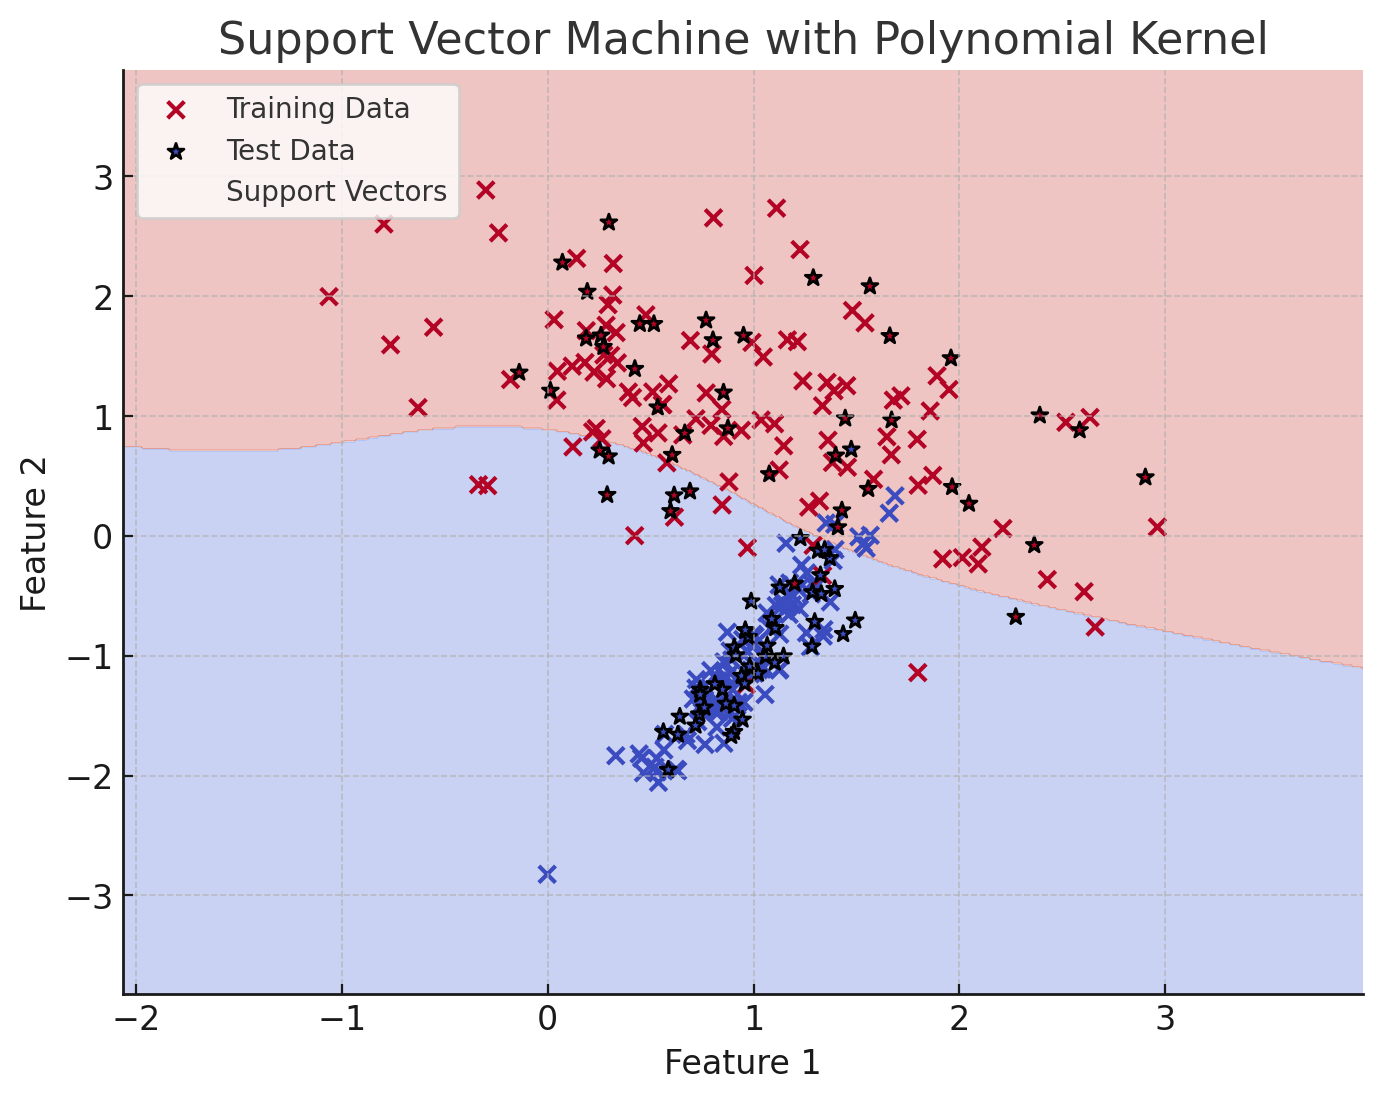

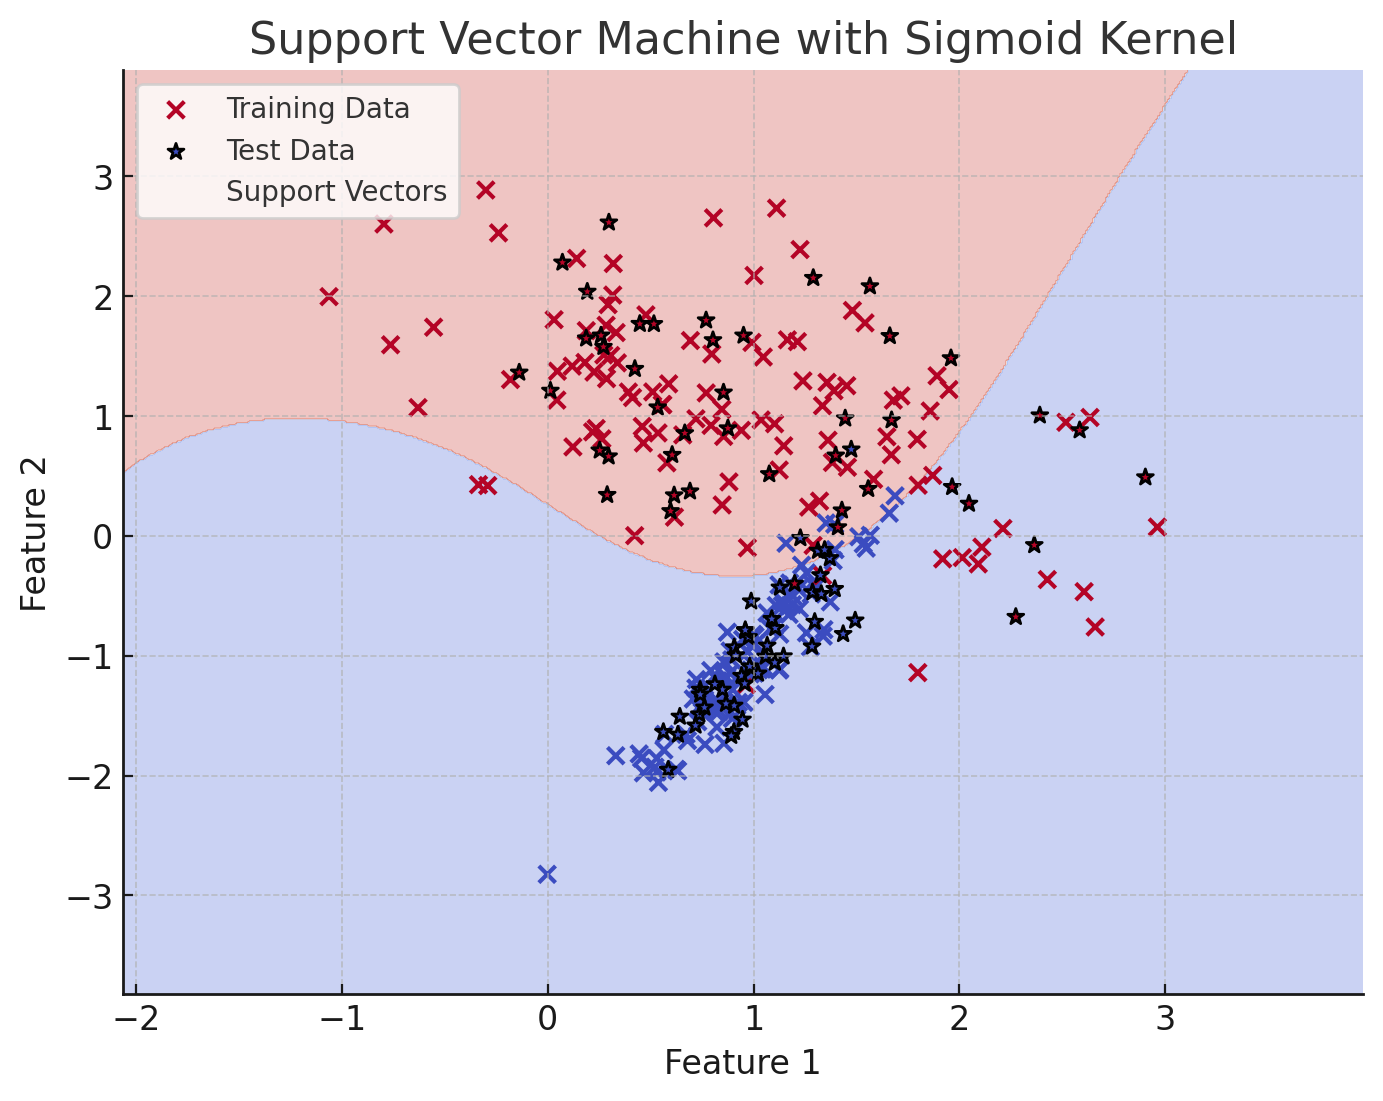

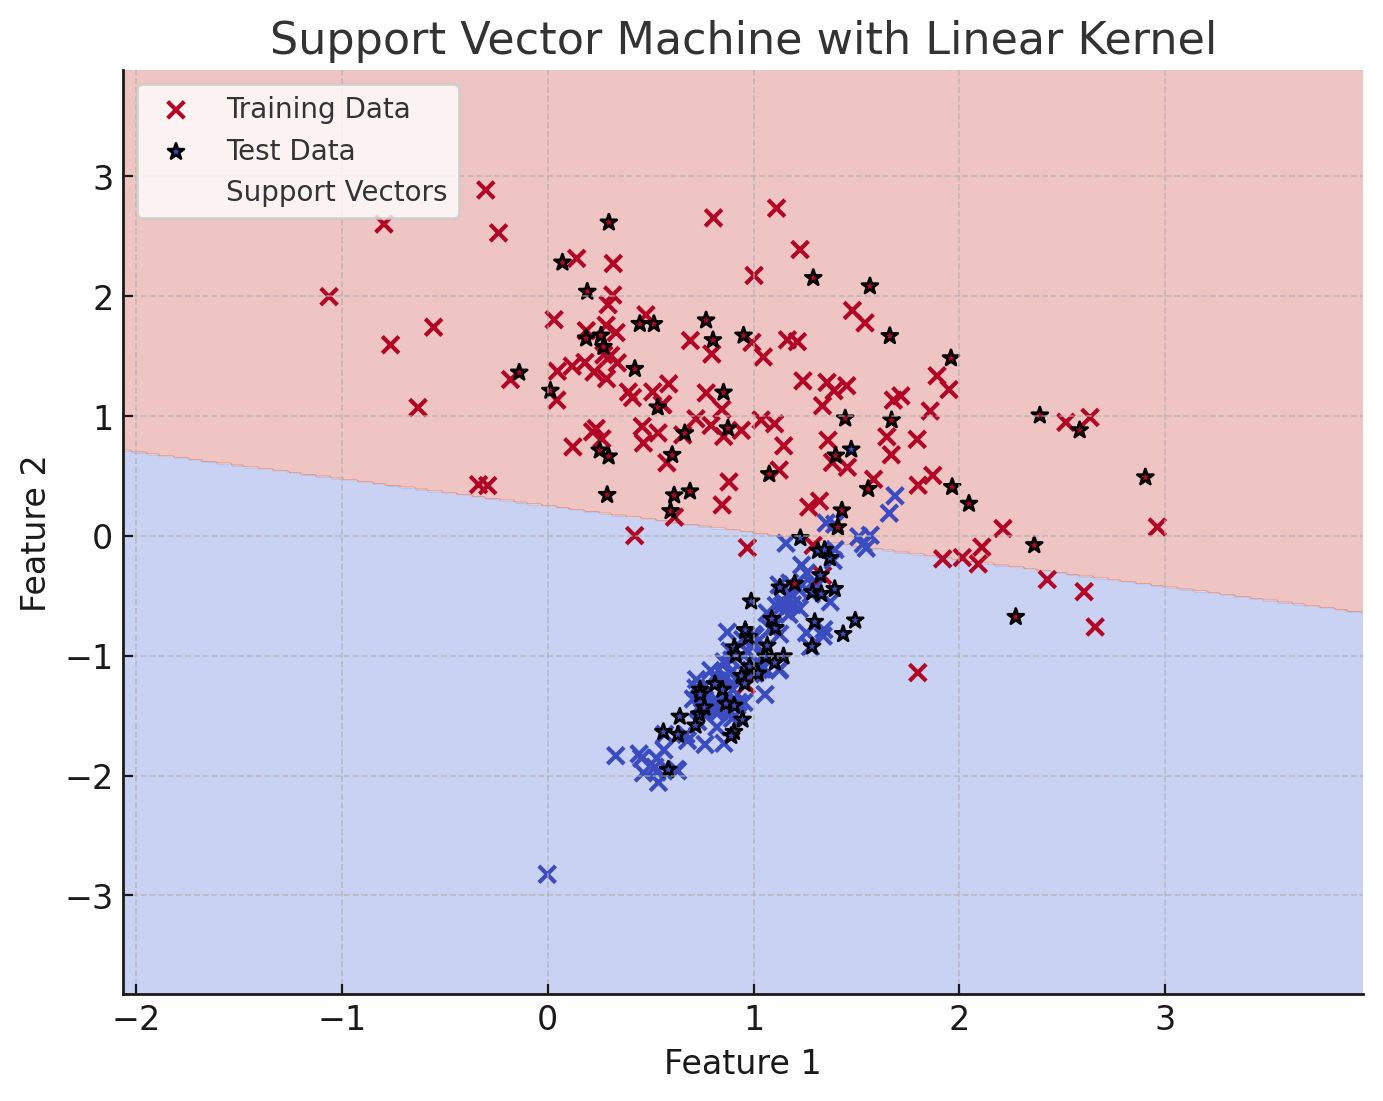

#📊 📊 📊

In [13]:
import numpy as np  # 🔢 Import NumPy for numerical operations
import matplotlib.pyplot as plt  # 📊 Import Matplotlib for visualization
import pandas as pd  # 📄 Import Pandas for data handling
import seaborn as sns  # Import seaborn for visualization without using patsy
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from sklearn.model_selection import train_test_split, cross_val_score  # 🔄 Import train-test split & cross-validation
from sklearn.preprocessing import StandardScaler  # ⚖️ Import StandardScaler for feature scaling
from sklearn.svm import SVC  # 🤖 Import SVM classifier
from sklearn.neighbors import KNeighborsClassifier  # 🔍 Import KNN classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix  # 📏 Import evaluation metrics
from IPython.display import display  # 💻 Import display for Jupyter Notebook


# 📂 Load dataset

In [14]:
# 📂 Load dataset
dataset = pd.read_csv('Social_Network_Ads.csv')  # Read dataset from CSV
X = dataset.iloc[:, :-1].values  # Select feature columns
y = dataset.iloc[:, -1].values  # Select target column

# ✂️ Split dataset into training and testing sets

In [15]:
# ✂️ Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)  # 75% training, 25% testing

# 🔄 Standardize feature scaling to normalize data

In [16]:
# 🔄 Standardize feature scaling to normalize data
sc = StandardScaler()  # Initialize scaler
X_train = sc.fit_transform(X_train)  # Fit and transform training data
X_test = sc.transform(X_test)  # Transform test data using the same scaler

# 🤖 Define models to test

In [17]:
# 🤖 Define models to test
models = {
    "SVM (Linear)": SVC(kernel='linear', random_state=0),  # SVM with linear kernel
    "SVM (Poly)": SVC(kernel='poly', degree=3, random_state=0),  # SVM with polynomial kernel (degree 3)
    "SVM (RBF)": SVC(kernel='rbf', random_state=0),  # SVM with radial basis function (RBF) kernel
    "SVM (Sigmoid)": SVC(kernel='sigmoid', random_state=0),  # SVM with sigmoid kernel
    "KNN (K=5)": KNeighborsClassifier(n_neighbors=5)  # K-Nearest Neighbors classifier with 5 neighbors
    }

# 📊 Dictionary to store performance metrics

In [18]:
# 📊 Dictionary to store performance metrics
metrics = {}  # Initialize empty dictionary for performance tracking
conf_matrices = {}  # Initialize empty dictionary for confusion matrices

# 🚀 Train, cross-validate, and evaluate each model

In [27]:
# 🚀 Train, cross-validate, and evaluate each model
for name, model in models.items():
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)  # Perform 5-fold cross-validation
    avg_cross_val_score = np.mean(cross_val_scores)  # Compute mean cross-validation score
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict test data labels

    # 🏆 Store performance metrics including cross-validation score
    metrics[name] = {
        "Cross-Val Accuracy": avg_cross_val_score,  # Cross-validation accuracy
        "Accuracy": accuracy_score(y_test, y_pred),  # Model accuracy
        "Precision": precision_score(y_test, y_pred),  # Precision score
        "Recall": recall_score(y_test, y_pred),  # Recall score
        "F1-Score": f1_score(y_test, y_pred),  # F1-score
        "ROC-AUC": roc_auc_score(y_test, y_pred)  # ROC-AUC score
    }

    conf_matrices[name] = confusion_matrix(y_test, y_pred)  # Store confusion matrix

# 📊 Convert performance metrics to DataFrame

In [20]:

# 📊 Convert performance metrics to DataFrame
metrics_df = pd.DataFrame(metrics).T  # Convert dictionary to DataFrame

# 📊 Convert confusion matrices to DataFrames

In [21]:
# 📊 Convert confusion matrices to DataFrames
conf_matrices_df = {name: pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']) for name, cm in conf_matrices.items()}

# 📌 Display performance metrics

In [22]:

# 📌 Display performance metrics
display(metrics_df.round(3))  # Show rounded performance metrics table

,Cross-Val Accuracy,Accuracy,Precision,Recall,F1-Score,ROC-AUC
SVM (Linear),0.823,0.90,0.923,0.750,0.828,0.860
SVM (Poly),0.820,0.86,0.950,0.594,0.731,0.790
SVM (RBF),0.903,0.93,0.879,0.906,0.892,0.924
SVM (Sigmoid),0.690,0.74,0.588,0.625,0.606,0.710
KNN (K=5),0.903,0.93,0.879,0.906,0.892,0.924


# 🔥 Plot confusion matrices

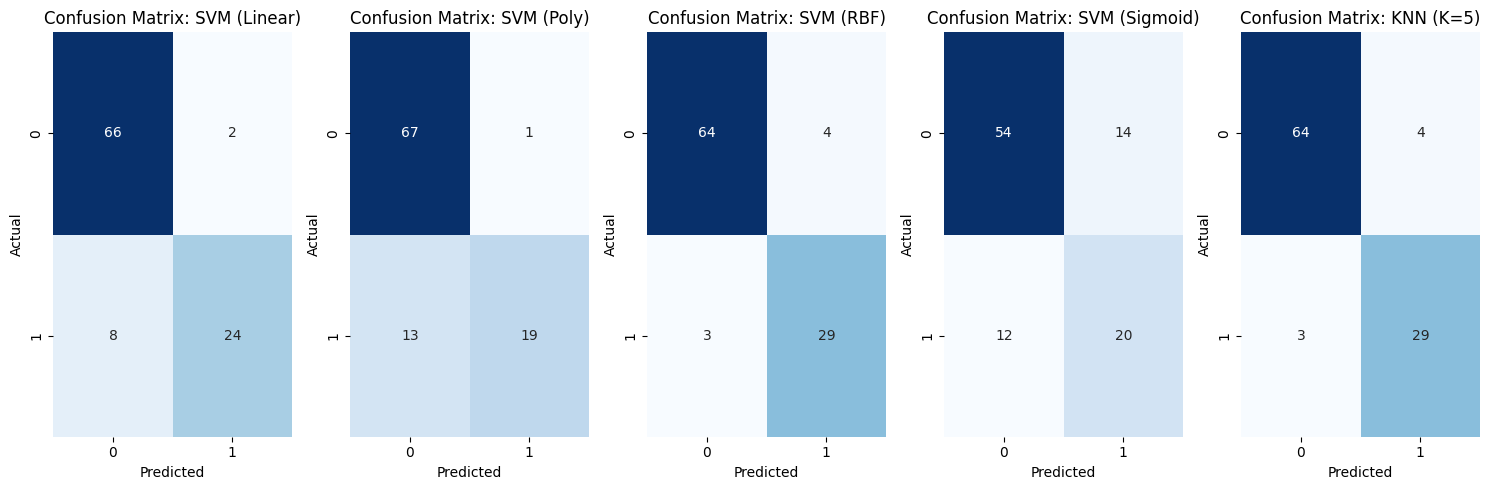

In [23]:
# 🔥 Plot confusion matrices
fig, axes = plt.subplots(1, len(conf_matrices), figsize=(15, 5))  # Create subplots
for ax, (name, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)  # Create heatmap for confusion matrix
    ax.set_title(f'Confusion Matrix: {name}')  # Set title
    ax.set_xlabel('Predicted')  # Label x-axis
    ax.set_ylabel('Actual')  # Label y-axis
plt.tight_layout()  # Adjust layout
plt.show()  # Show plot


# 🖼️ Display confusion matrices as tables

In [24]:
# 🖼️ Display confusion matrices as tables
for name, cm_df in conf_matrices_df.items():
    print(f'Confusion Matrix for {name}:')  # Print model name
    display(cm_df)  # Display confusion matrix as table

Confusion Matrix for SVM (Linear):


,Predicted 0,Predicted 1
Actual 0,66,2
Actual 1,8,24


Confusion Matrix for SVM (Poly):


,Predicted 0,Predicted 1
Actual 0,67,1
Actual 1,13,19


Confusion Matrix for SVM (RBF):


,Predicted 0,Predicted 1
Actual 0,64,4
Actual 1,3,29


Confusion Matrix for SVM (Sigmoid):


,Predicted 0,Predicted 1
Actual 0,54,14
Actual 1,12,20


Confusion Matrix for KNN (K=5):


,Predicted 0,Predicted 1
Actual 0,64,4
Actual 1,3,29


# 🎯 Function to plot decision boundaries

In [25]:
# 🎯 Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    from matplotlib.colors import ListedColormap  # Import color mapping
    X_set, y_set = sc.inverse_transform(X), y  # Reverse scaling for visualization
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.5),  # Create grid for X1
        np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=500)  # Create grid for X2
    )
    plt.contourf(
        X1, X2, model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),  # Predict for grid points
        alpha=0.75, cmap=ListedColormap(('red', 'green'))  # Use red-green colormap
    )
    plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')))  # Scatter plot of data points
    plt.title(title)  # Set plot title
    plt.xlabel('Age')  # Label x-axis
    plt.ylabel('Estimated Salary')  # Label y-axis
    plt.show()  # Display the plot


# 🔄 Generate decision boundary plots

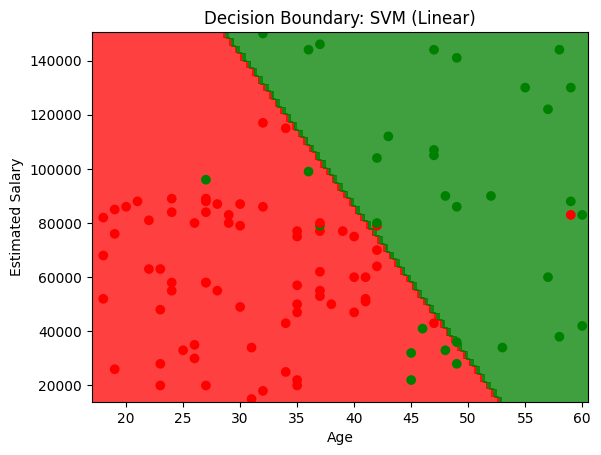

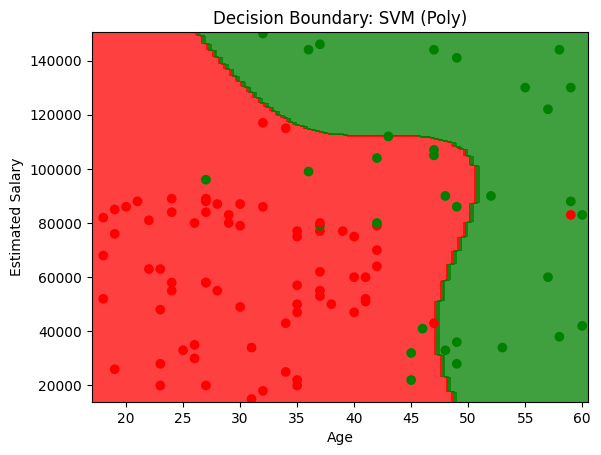

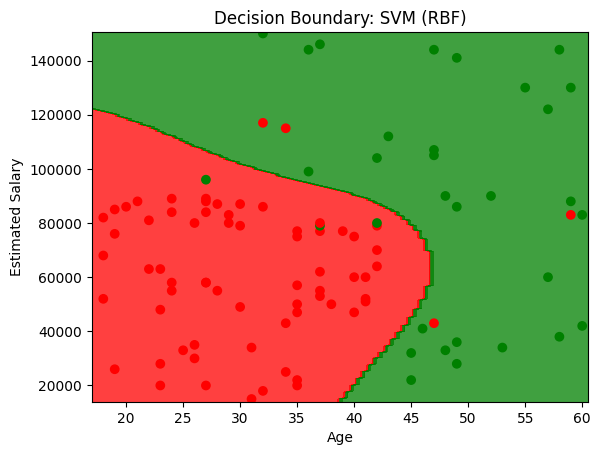

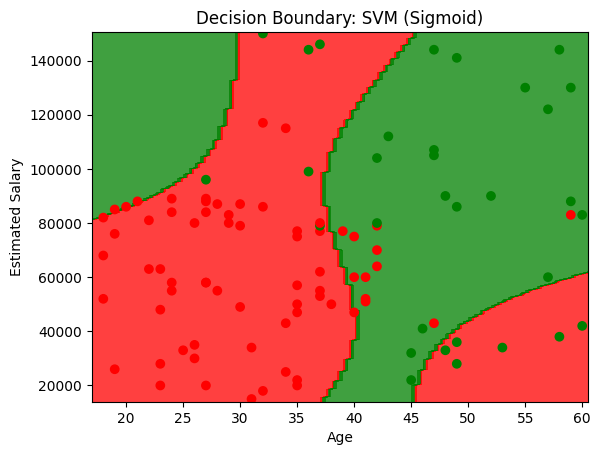

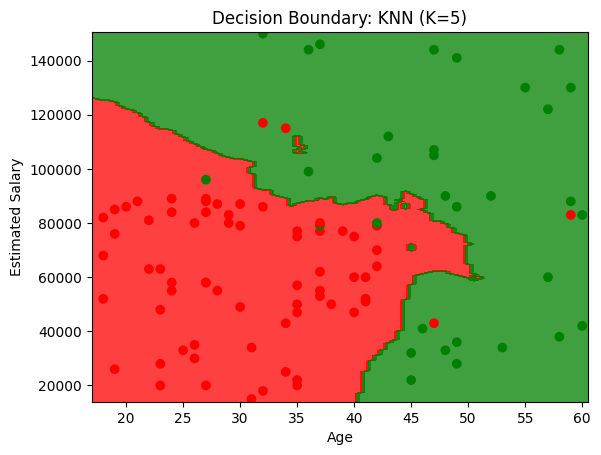

In [26]:
# 🔄 Generate decision boundary plots
for name, model in models.items():
    plot_decision_boundary(model, X_test, y_test, title=f'Decision Boundary: {name}')  # Plot decision boundary for each model